# Foreigners in Germany

This notebook analyzes a 100-meter grid covering all of Germany, investigating potential relationships between the foreign population and residential clusters.

In [1]:
ls /data/uscuni-germany/processed_data/

Bevoelkerung100M_clusters.parquet  foreigners_2022.parquet
Bevoelkerung100M.parquet           Geb100m.parquet
cluster_grid_assignment_v2.csv     Haushalte100m.parquet
Familie100m.parquet                regression_stats
fbg_age.parquet                    rent_2022.parquet
fbg_ntn.parquet                    Wohnungen100m.parquet
fbg_rgn.parquet                    Zensus_Bevoelkerung_100m-Gitter.parquet


In [105]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [12]:
# Load cluster data
clusters = pd.read_csv('/data/uscuni-germany/processed_data/cluster_grid_assignment_v2.csv')
clusters

,Unnamed: 0,0
0,CRS3035RES100mN3046000E4121600,23
1,CRS3035RES100mN3046000E4122000,23
2,CRS3035RES100mN3046000E4122100,23
3,CRS3035RES100mN3046100E4122100,23
4,CRS3035RES100mN3046200E4121800,23
...,...,...
3064026,CRS3035RES100mN3105800E4663400,13
3064027,CRS3035RES100mN3105900E4663400,13
3064028,CRS3035RES100mN3105900E4663500,13
3064029,CRS3035RES100mN3106200E4663400,13


In [17]:
# Rename columns
clusters = clusters.rename(columns={"Unnamed: 0": "GITTER_ID_100m", "0": "cluster"})

In [18]:
clusters

,GITTER_ID_100m,cluster
0,CRS3035RES100mN3046000E4121600,23
1,CRS3035RES100mN3046000E4122000,23
2,CRS3035RES100mN3046000E4122100,23
3,CRS3035RES100mN3046100E4122100,23
4,CRS3035RES100mN3046200E4121800,23
...,...,...
3064026,CRS3035RES100mN3105800E4663400,13
3064027,CRS3035RES100mN3105900E4663400,13
3064028,CRS3035RES100mN3105900E4663500,13
3064029,CRS3035RES100mN3106200E4663400,13


In [34]:
# Read foreigners data
rid = gpd.read_parquet('/data/uscuni-germany/processed_data/foreigners_2022.parquet')
grid = grid.reset_index()

In [85]:
# Join cluster data with foreigners
cluster_grid = clusters.merge(grid, on = "GITTER_ID_100m", how = "right")
cluster_grid.head(2)

,GITTER_ID_100m,cluster,x_mp_100m,y_mp_100m,AnteilAuslaender,werterlaeuternde_Zeichen,geometry
0,CRS3035RES100mN2689100E4337000,13.0,4337050,2689150,"100,00",KLAMMERN,"POLYGON ((4337100 2689200, 4337100 2689100, 43..."
1,CRS3035RES100mN2689100E4341100,13.0,4341150,2689150,–,None,"POLYGON ((4341200 2689200, 4341200 2689100, 43..."


In [91]:
# Clean dataset
cluster_grid["AnteilAuslaender"] = cluster_grid["AnteilAuslaender"] \
    .str.replace(',', '.') \
    .replace('–', np.nan) \
    .astype('float')


In [153]:
# Create a new column with qunatiles
cluster_grid["f_share_cat"] = pd.qcut(cluster_grid["AnteilAuslaender"], q = 10,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,10])

In [154]:
cluster_grid

,GITTER_ID_100m,cluster,x_mp_100m,y_mp_100m,AnteilAuslaender,werterlaeuternde_Zeichen,geometry,f_share_cat
0,CRS3035RES100mN2689100E4337000,13.0,4337050,2689150,100.00,KLAMMERN,"POLYGON ((4337100 2689200, 4337100 2689100, 43...",10
1,CRS3035RES100mN2689100E4341100,13.0,4341150,2689150,NaN,None,"POLYGON ((4341200 2689200, 4341200 2689100, 43...",NaN
2,CRS3035RES100mN2690800E4341200,13.0,4341250,2690850,NaN,None,"POLYGON ((4341300 2690900, 4341300 2690800, 43...",NaN
3,CRS3035RES100mN2691200E4341200,13.0,4341250,2691250,27.27,KLAMMERN,"POLYGON ((4341300 2691300, 4341300 2691200, 43...",8
4,CRS3035RES100mN2691300E4341200,13.0,4341250,2691350,NaN,None,"POLYGON ((4341300 2691400, 4341300 2691300, 43...",NaN
...,...,...,...,...,...,...,...,...
3088038,CRS3035RES100mN3547500E4220100,5.0,4220150,3547550,NaN,None,"POLYGON ((4220200 3547600, 4220200 3547500, 42...",NaN
3088039,CRS3035RES100mN3547600E4219800,12.0,4219850,3547650,NaN,None,"POLYGON ((4219900 3547700, 4219900 3547600, 42...",NaN
3088040,CRS3035RES100mN3547600E4219900,12.0,4219950,3547650,36.36,KLAMMERN,"POLYGON ((4220000 3547700, 4220000 3547600, 42...",9
3088041,CRS3035RES100mN3547600E4220000,5.0,4220050,3547650,100.00,KLAMMERN,"POLYGON ((4220100 3547700, 4220100 3547600, 42...",10


In [117]:
# Group by clusters and calculate the distribution for foreigners
cluster_distribution = cluster_grid.groupby('cluster')['AnteilAuslaender'].describe().sort_values('mean')
cluster_distribution

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
10.0,51003.0,16.692703,12.801779,1.03,8.1100,12.970,21.2100,100.0
25.0,3710.0,17.790367,17.173319,0.83,6.9800,12.610,22.2200,100.0
4.0,53037.0,18.648102,13.229320,1.66,9.5700,14.890,23.6400,100.0
9.0,75430.0,18.757739,14.042640,1.65,9.6200,14.630,23.1575,100.0
5.0,32968.0,19.192879,13.757526,1.38,9.3000,15.380,25.0000,100.0
24.0,18355.0,19.940070,15.140654,1.33,9.8000,15.630,25.0000,100.0
0.0,44433.0,19.986083,14.200325,1.39,9.7600,16.070,26.2400,100.0
1.0,101275.0,20.550710,15.475712,1.15,9.7600,16.130,26.6700,100.0
31.0,30123.0,21.162392,15.831091,1.40,10.7100,16.670,26.4700,100.0


<Axes: xlabel='cluster'>

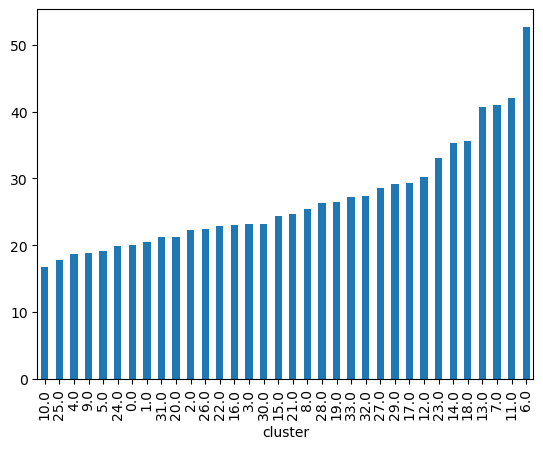

In [119]:
# Plot the mean distribution of foreigners across clusters
cluster_distribution['mean'].plot.bar()

In [155]:
# Group by clusters and calculate the distribution of foreigners within quantiles
foreigners_distribution = cluster_grid.groupby('cluster')['f_share_cat'].value_counts().unstack()

foreigners_distribution['sum'] = foreigners_distribution.sum(axis=1)
foreigners_distribution = foreigners_distribution.div(foreigners_distribution['sum'], axis = 0)*100


In [158]:
foreigners_distribution.sort_values(10)

f_share_cat,1,2,3,4,5,6,7,8,9,10,sum
cluster,,,,,,,,,,,
10.0,18.759681,14.595220,12.593377,11.377762,9.687665,9.183774,8.315197,6.872145,5.721232,2.893947,100.0
4.0,11.109226,13.882761,13.128571,11.757829,10.673681,10.534155,9.629127,8.256500,7.219488,3.808662,100.0
9.0,10.856423,13.995758,13.717354,12.366432,10.799417,10.300941,9.075964,7.910646,6.584913,4.392152,100.0
5.0,14.289614,11.841786,11.095608,10.968212,9.812545,10.155302,9.776147,9.045135,8.581048,4.434603,100.0
0.0,12.400693,11.509464,11.180879,10.618234,10.046587,10.314406,10.060090,9.661738,9.112596,5.095312,100.0
24.0,10.792700,12.606919,12.601471,11.304822,10.939798,10.078998,9.425225,8.820485,8.057750,5.371833,100.0
25.0,25.822102,12.425876,9.407008,9.973046,8.948787,7.762803,7.061995,6.954178,6.091644,5.552561,100.0
1.0,12.518391,11.513207,11.000741,10.481363,9.809923,10.016292,10.230560,9.341891,9.039743,6.047889,100.0
20.0,15.296840,9.288222,8.578040,9.088733,8.953080,9.695180,10.636770,10.652729,11.338972,6.471433,100.0


<Axes: xlabel='cluster'>

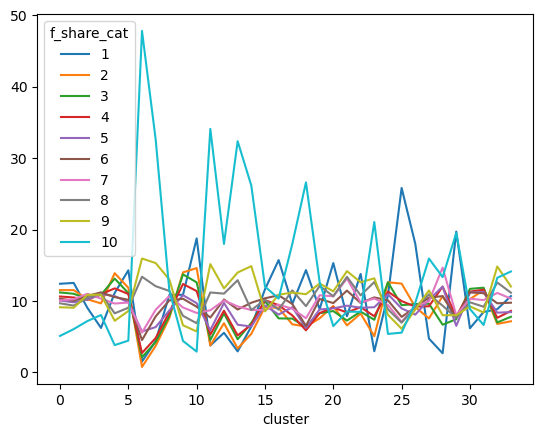

In [165]:
# Plot the quantiles against clusters
foreigners_distribution.iloc[:,0:10].plot()